# Generador de imagen del conjunto de Mandelbrot

Nota: Este código no está optimizado, puede tardar mucho en ejecutarse

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
resolution = 200
iterations = 500
xlim = (-2.2, 0.8)
ylim = (-1.5, 1.5)

mask = np.ones((resolution,resolution), dtype=bool)
iter_mask = np.zeros((resolution,resolution))
z = np.zeros((resolution,resolution), np.complex128)
c = np.zeros((resolution,resolution), np.complex128)
c.real, c.imag = np.meshgrid(np.linspace(xlim[0], xlim[1], resolution), np.linspace(ylim[0], ylim[1], resolution))
for i in range(iterations):
    if (i+1) % int(iterations/10) == 0:
        print(str(int(round(100*i/iterations))) + '%')
    rows, cols = np.where(mask)
    for j in range(len(rows)):
        row, col = rows[j], cols[j]
        z[row,col] = z[row,col]**2 + c[row,col]
        if np.abs(z[row,col]) > 2:
            mask[row,col] = False
        else:
            iter_mask[row,col] += 1

iter_mask[mask] = 0
x = iter_mask/iter_mask.max()

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [5]:
k = 15
img = 1 - np.exp(-k*x) + x*np.exp(-k)

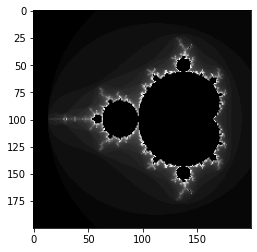

In [6]:
plt.imshow(img, 'gray')

In [7]:
np.save('mandelbrot2.npy', img)